# Flight Price Prediction

~Importing datset

In [1458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1459]:
df = pd.read_csv("Data_Train.csv")

In [1460]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Data cleaning

In [1461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [1462]:
df.dropna(inplace=True)

In [1463]:
df.shape

(10682, 11)

In [1464]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [1465]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [1466]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [1467]:
df['Day'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [1468]:
df['Month'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [1469]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
4081,IndiGo,6/06/2019,Delhi,Cochin,DEL ? HYD ? COK,06:50,22:30,15h 40m,1 stop,No info,6674,6,6
5388,IndiGo,1/03/2019,Mumbai,Hyderabad,BOM ? HYD,02:30,04:00,1h 30m,non-stop,No info,16000,1,3
4256,IndiGo,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,15:00,01:30 22 May,10h 30m,1 stop,No info,6896,21,5
5899,SpiceJet,9/05/2019,Banglore,Delhi,BLR ? DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3573,9,5
9845,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:30,12:35 19 May,25h 5m,1 stop,In-flight meal not included,12373,18,5


In [1470]:
df.drop(['Date_of_Journey'], axis =1, inplace=True)

In [1471]:
df['Dep_Time'] = pd.to_datetime(df.Dep_Time).dt.hour

C:\Users\Nomundari\AppData\Local\Temp\ipykernel_9652\3845022032.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time'] = pd.to_datetime(df.Dep_Time).dt.hour


In [1472]:
df['Arrival_Time'] = pd.to_datetime(df.Arrival_Time).dt.hour

C:\Users\Nomundari\AppData\Local\Temp\ipykernel_9652\3578999735.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df.Arrival_Time).dt.hour


In [1473]:
# def categorize_dep_time(hour):    
#     if 5 <= hour < 12 :
#         return 'Dep_Morning'
#     elif 12 <= hour < 17:
#         return 'Dep_Afternoon'
#     elif 17 <= hour < 21:
#         return 'Dep_Evening'
#     else:
#         return 'Dep_Night'
# df['Dep_Time'] = df['Dep_Time'].apply(categorize_dep_time)

In [1474]:
# def categorize_arr_time(hour):    
#     if 5 <= hour < 12 :
#         return 'Arr_Morning'
#     elif 12 <= hour < 17:
#         return 'Arr_Afternoon'
#     elif 17 <= hour < 21:
#         return 'Arr_Evening'
#     else:
#         return 'Arr_Night'
# df['Arrival_Time'] = df['Arrival_Time'].apply(categorize_arr_time)

In [1475]:
df.sample(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
7682,Jet Airways,Kolkata,Banglore,CCU ? DEL ? BLR,17,21,28h 5m,1 stop,No info,12692,9,6
9096,IndiGo,Banglore,Delhi,BLR ? DEL,10,13,2h 50m,non-stop,No info,3943,21,5
104,Air India,Banglore,Delhi,BLR ? DEL,6,8,2h 45m,non-stop,No info,6121,1,5
10266,Jet Airways,Delhi,Cochin,DEL ? JAI ? BOM ? COK,9,12,26h 55m,2 stops,In-flight meal not included,10368,3,6
5201,Air India,Delhi,Cochin,DEL ? CCU ? BOM ? COK,20,19,23h,2 stops,No info,13381,27,5


In [1476]:
def convert_to_minutes(duration):
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours_part = duration.split('h')[0]
        hours = int(hours_part)
        minutes_part = duration.split('h')[1].replace('m', '')
        if minutes_part:
            minutes = int(minutes_part)
    else:
        minutes = int(duration.replace('m', ''))
        
    total_minutes = hours*60+minutes
    return total_minutes
df['Duration'] = df['Duration'].apply(convert_to_minutes)    

In [1477]:
df.sample(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
1714,Air India,Kolkata,Banglore,CCU ? GAU ? BLR,16,21,1700,1 stop,No info,7452,15,5
399,Air India,Kolkata,Banglore,CCU ? BOM ? GOI ? BLR,16,5,765,2 stops,No info,11432,6,6
6838,IndiGo,Delhi,Cochin,DEL ? HYD ? COK,7,16,515,1 stop,No info,6442,18,5
5247,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,7,21,860,1 stop,In-flight meal not included,7832,21,3
7839,SpiceJet,Kolkata,Banglore,CCU ? BLR,6,9,160,non-stop,No check-in baggage included,3815,15,3


In [1478]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [1479]:
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22,1,170,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5,13,445,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9,4,1140,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18,23,325,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16,21,285,1,No info,13302,1,3


In [1480]:
df.drop(['Route', 'Additional_Info'],axis =1, inplace = True)

In [1481]:
df.sample(3)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month
3850,IndiGo,Delhi,Cochin,2,7,345,1,6426,21,3
3725,SpiceJet,Mumbai,Hyderabad,22,0,90,0,1965,27,5
6496,SpiceJet,Banglore,Delhi,5,8,160,0,3625,18,6


Remove Outliers

In [1482]:
df[['Price','Duration']].describe()

,Price,Duration
count,10682.000000,10682.000000
mean,9087.214567,643.020502
std,4611.548810,507.830133
min,1759.000000,5.000000
25%,5277.000000,170.000000
50%,8372.000000,520.000000
75%,12373.000000,930.000000
max,79512.000000,2860.000000


In [1483]:
def remove_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    return df[(df[column]<= mean-3*std) & (df[column]<= mean+3*std)]
df_no_outliers = remove_outliers(df, 'Price') 

Data Visualization

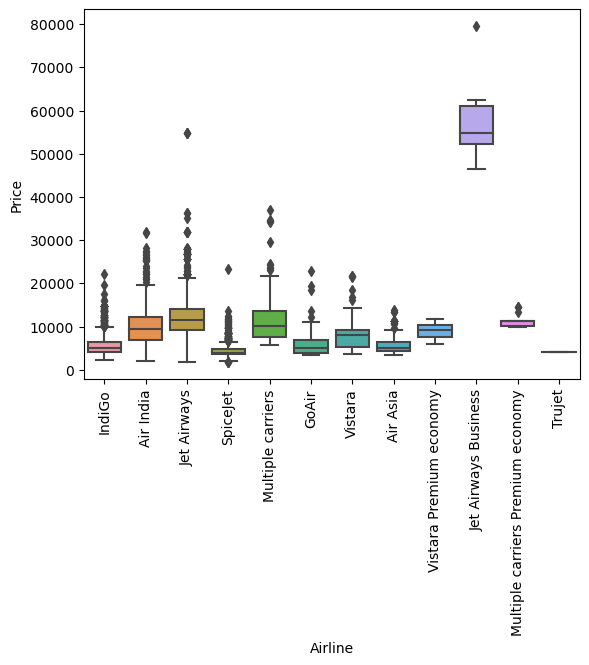

In [1484]:
sns.boxplot(x = 'Airline', y = 'Price', data = df)
plt.xticks(rotation=90)
plt.show()

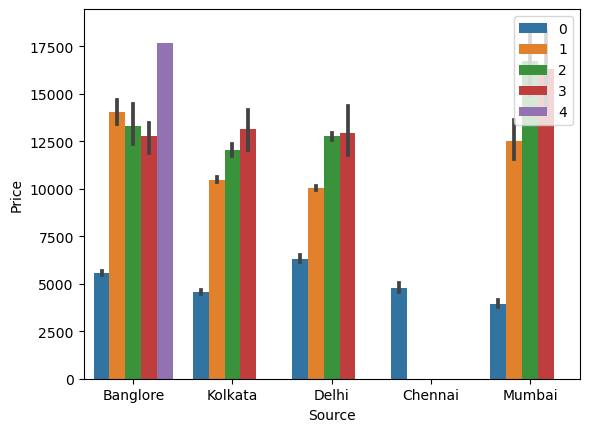

In [1485]:
sns.barplot(x = 'Source', y = 'Price', data = df, hue ='Total_Stops')
plt.legend(loc = 'upper right')
plt.show()

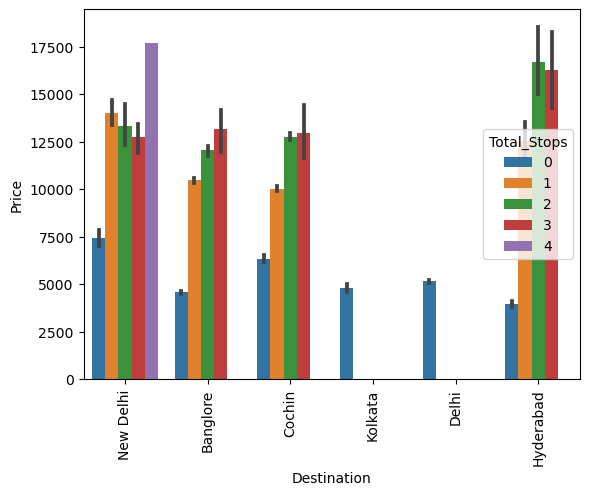

In [1486]:
sns.barplot(x = 'Destination', y = 'Price', data = df, hue = 'Total_Stops')
plt.xticks(rotation=90)
plt.show()

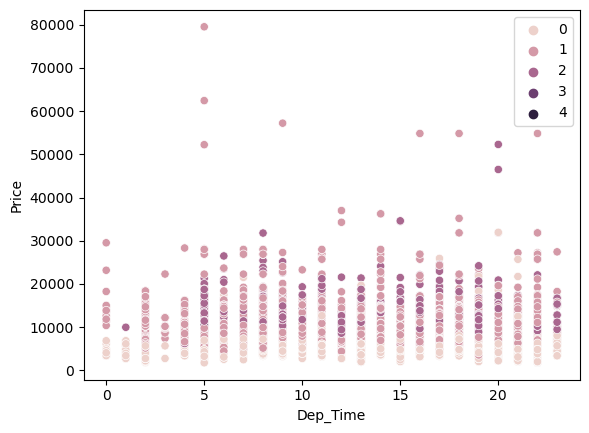

In [1487]:
sns.scatterplot(x = 'Dep_Time', y = 'Price', data = df, hue = 'Total_Stops')
plt.legend(loc = 'upper right')
plt.show()

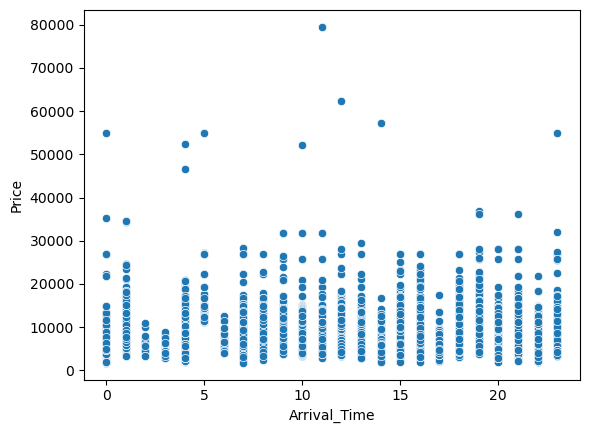

In [1488]:
sns.scatterplot(x = 'Arrival_Time', y = 'Price', data = df)
plt.show()

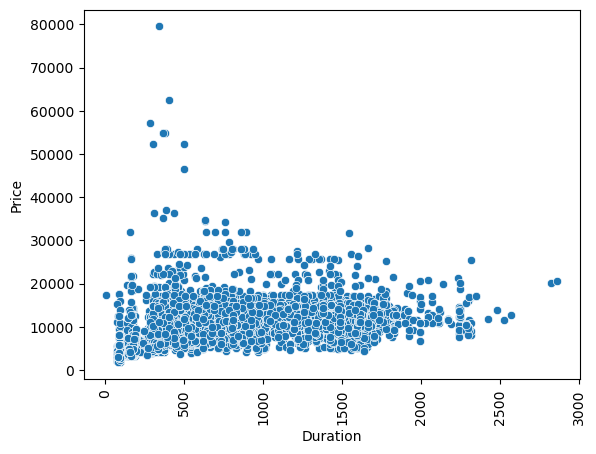

In [1489]:
sns.scatterplot(x = 'Duration', y = 'Price', data = df)
plt.xticks(rotation=90)
plt.show()

Building models

In [1490]:
airline = pd.get_dummies(df.Airline, drop_first = True).astype(int)
airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [1491]:
source = pd.get_dummies(df.Source, drop_first = True).astype(int)
source.isna().sum()

Chennai    0
Delhi      0
Kolkata    0
Mumbai     0
dtype: int64

In [1492]:
destination = pd.get_dummies(df.Destination, drop_first = True).astype(int)
destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [1493]:
# dep_time = pd.get_dummies(df.Dep_Time, drop_first = True).astype(int)
# dep_time

In [1494]:
# arr_time = pd.get_dummies(df.Arrival_Time, drop_first = True).astype(int)
# arr_time

In [1495]:
df.reset_index(drop=True, inplace=True)
airline.reset_index(drop=True, inplace=True)
source.reset_index(drop=True, inplace=True)
destination.reset_index(drop=True, inplace=True)
# dep_time.reset_index(drop=True, inplace=True)
# arr_time.reset_index(drop=True, inplace=True)

In [1496]:
pdlist = [df, airline, source, destination]
df = pd.concat(pdlist, axis = 'columns')
df.drop(['Airline','Source','Destination'], axis=1, inplace =True)
df.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Air India,GoAir,IndiGo,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,22,1,170,0,3897,24,3,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5,13,445,2,7662,1,5,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,9,4,1140,2,13882,9,6,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,18,23,325,1,6218,12,5,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,16,21,285,1,13302,1,3,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [1497]:
X = df.drop(['Price'], axis =1)
X.shape

(10682, 26)

In [1498]:
y = df['Price']
len(y)

10682

In [1499]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =10)

In [1500]:
from sklearn.linear_model import  LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5738560640477735

In [1501]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv= ShuffleSplit(n_splits = 5, test_size =0.2, random_state = 0)
cross_val_score(LinearRegression(),X,y, cv = cv)

array([0.58894317, 0.63826793, 0.64099325, 0.60545023, 0.64666805])

In [1503]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Nomundari\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nomundari\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nomundari\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Nomundari\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Nomundari\anaconda

,model,best_score,best_params
0,linear_regression,0.624065,{}
1,lasso,0.622957,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.678131,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
